   Width  Length  type
0    1.7    20.5     0
1    2.1    19.3     0
2    1.4    17.4     0
3    1.6    13.6     0
4    2.9    23.5     0
type
0    31
2    18
1    16
Name: count, dtype: int64


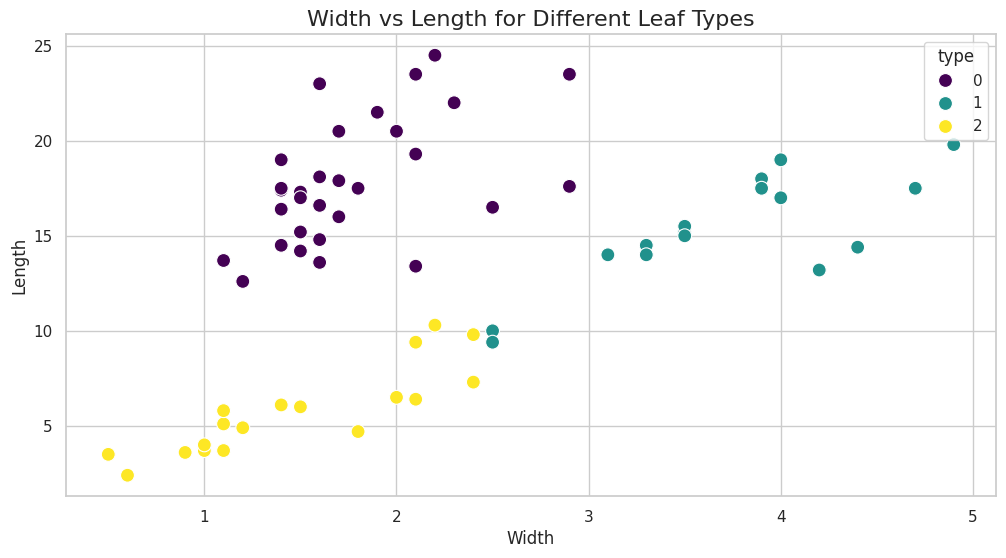

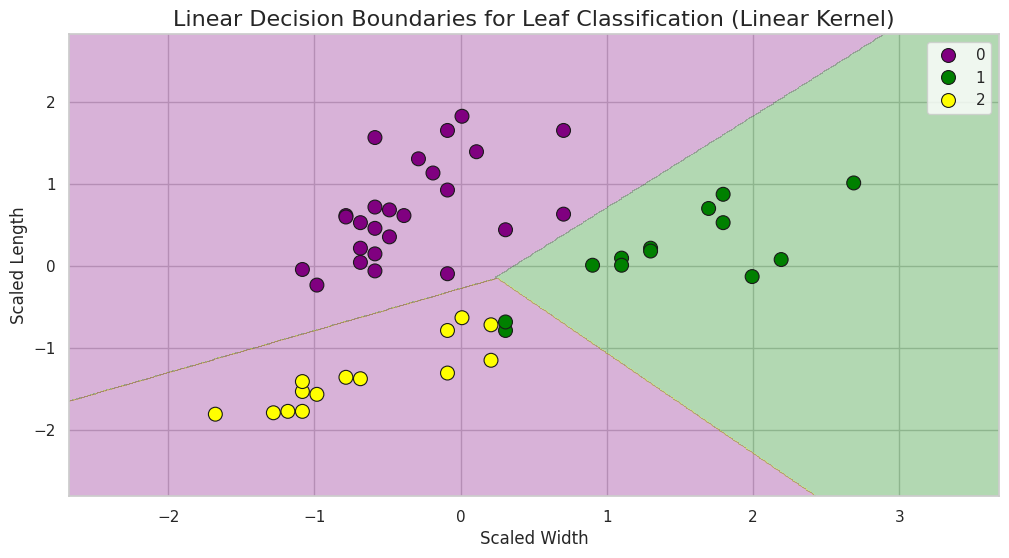

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Load the Data (replace with your actual file paths)
type1_file = '/content/Leaves Dataset - Eucalyptus (1).csv'
type2_file = '/content/Leaves Dataset - Mango (1).csv'
type3_file = '/content/Leaves Dataset - Neem (1).csv'

# Load the data and assign labels
type1 = pd.read_csv(type1_file)
type1['type'] = 0  # Label for Eucalyptus

type2 = pd.read_csv(type2_file)
type2['type'] = 1  # Label for Mango

type3 = pd.read_csv(type3_file)
type3['type'] = 2  # Label for Neem

# Combine data into a single DataFrame
data = pd.concat([type1, type2, type3], ignore_index=True)

# Quick summary and distribution of data
print(data.head())
print(data['type'].value_counts())

# Visualize distributions
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Width', y='Length', hue='type', palette='viridis', s=100)
plt.title("Width vs Length for Different Leaf Types", fontsize=16)
plt.xlabel("Width")
plt.ylabel("Length")

plt.show()

# Extract Features and Labels
X = data[['Width', 'Length']].values
y = data['type'].values

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Classifier (using a Linear Kernel for linear classification)
clf = SVC(kernel='linear', probability=False)
clf.fit(X_train_scaled, y_train)

# Visualize Decision Boundaries
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define a consistent color palette
palette = {0: "purple", 1: "green", 2: "yellow"}  # Ensure consistency in colors

plt.figure(figsize=(12, 6))
plt.contourf(xx, yy, Z, alpha=0.3, levels=3, colors=[palette[0], palette[1], palette[2]])  # Use consistent colors
sns.scatterplot(
    x=X_train_scaled[:, 0], y=X_train_scaled[:, 1],
    hue=y_train,
    palette=palette,
    s=100, edgecolor='k'
)
plt.title("Linear Decision Boundaries for Leaf Classification (Linear Kernel)", fontsize=16)
plt.xlabel("Scaled Width")
plt.ylabel("Scaled Length")

plt.show()


   Width  Length  type
0    1.7    20.5     0
1    2.1    19.3     0
2    1.4    17.4     0
3    1.6    13.6     0
4    2.9    23.5     0
type
0    31
2    18
1    16
Name: count, dtype: int64


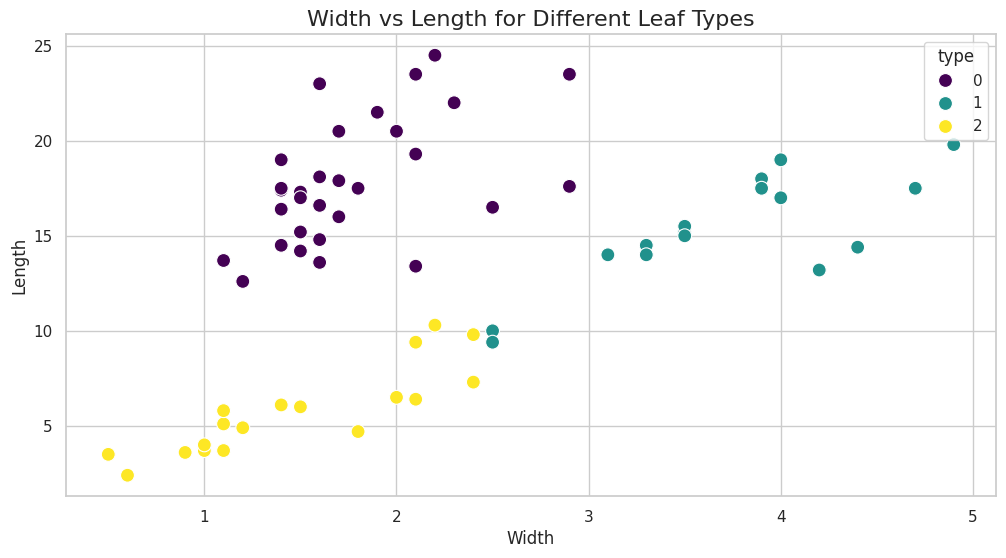

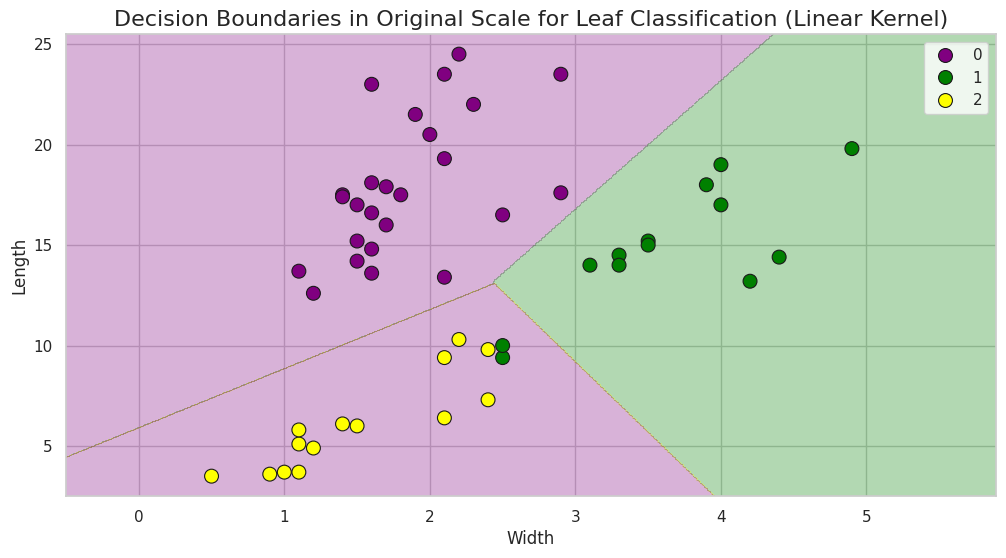

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Load the Data (replace with your actual file paths)
type1_file = '/content/Leaves Dataset - Eucalyptus (1).csv'
type2_file = '/content/Leaves Dataset - Mango (1).csv'
type3_file = '/content/Leaves Dataset - Neem (1).csv'

# Load the data and assign labels
type1 = pd.read_csv(type1_file)
type1['type'] = 0  # Label for Eucalyptus

type2 = pd.read_csv(type2_file)
type2['type'] = 1  # Label for Mango

type3 = pd.read_csv(type3_file)
type3['type'] = 2  # Label for Neem

# Combine data into a single DataFrame
data = pd.concat([type1, type2, type3], ignore_index=True)

# Quick summary and distribution of data
print(data.head())
print(data['type'].value_counts())

# Visualize distributions
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Width', y='Length', hue='type', palette='viridis', s=100)
plt.title("Width vs Length for Different Leaf Types", fontsize=16)
plt.xlabel("Width")
plt.ylabel("Length")

plt.show()

# Extract Features and Labels
X = data[['Width', 'Length']].values
y = data['type'].values

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Classifier (using a Linear Kernel for linear classification)
clf = SVC(kernel='linear', probability=False)
clf.fit(X_train_scaled, y_train)

# Visualize Decision Boundaries in the Original Scale
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Scale the mesh grid points to match the scaled classifier
grid_points_scaled = scaler.transform(np.c_[xx.ravel(), yy.ravel()])
Z = clf.predict(grid_points_scaled)
Z = Z.reshape(xx.shape)

# Define consistent color palette for original scale visualization
palette_original = {0: "purple", 1: "green", 2: "yellow"}

plt.figure(figsize=(12, 6))
plt.contourf(xx, yy, Z, alpha=0.3, levels=3, colors=[palette_original[0], palette_original[1], palette_original[2]])  # Background decision boundaries
sns.scatterplot(
    x=X_train[:, 0], y=X_train[:, 1],
    hue=y_train,
    palette=palette_original,
    s=100, edgecolor='k'
)
plt.title("Decision Boundaries in Original Scale for Leaf Classification (Linear Kernel)", fontsize=16)
plt.xlabel("Width")
plt.ylabel("Length")

plt.show()
